In [1]:
# ALL THANKS AND GLORY TO THE AND my ONLY GOD AND LORD JESUS CHRIST ALONE


In [2]:
#BY GOD'S GRACE ALONE, declaring  imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from sklearn.ensemble import RandomForestClassifier


In [3]:
#BY GOD'S GRACE ALONE
df = pd.read_csv("datasets/GTLJC_data2.csv", delimiter=",")

In [4]:
df.head()

,batch,acc_x,acc_y,acc_z,rot_x,rot_y,rot_z,GPS_calc_speed,timestamp,latitude,longitude,accuracy,date_time,anomaly,speed_level
0,1,0.36,-0.50,10.57,0.03,0.01,-0.02,0.0,1,0.0,0.0,2.94,07/06/2025 15:12:50:3.117733,smooth,AVERAGE
1,1,1.59,-0.34,12.11,0.06,0.12,-0.02,0.0,2,0.0,0.0,2.94,07/06/2025 15:12:50:-0.000000,smooth,AVERAGE
2,1,1.58,0.46,9.57,-0.01,0.07,0.01,0.0,3,0.0,0.0,2.94,07/06/2025 15:12:50:-0.000000,smooth,AVERAGE
3,1,1.87,-0.96,10.04,0.04,-0.01,0.01,0.0,4,0.0,0.0,2.94,07/06/2025 15:12:51:-0.000000,smooth,AVERAGE
4,1,2.37,-0.09,8.40,0.03,-0.03,0.01,0.0,5,0.0,0.0,2.94,07/06/2025 15:12:51:-0.000000,smooth,AVERAGE


In [5]:
df.shape

(36388, 15)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36388 entries, 0 to 36387
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   batch           36388 non-null  int64  
 1   acc_x           36388 non-null  float64
 2   acc_y           36388 non-null  float64
 3   acc_z           36388 non-null  float64
 4   rot_x           36388 non-null  float64
 5   rot_y           36388 non-null  float64
 6   rot_z           36388 non-null  float64
 7   GPS_calc_speed  36388 non-null  float64
 8   timestamp       36388 non-null  int64  
 9   latitude        36388 non-null  float64
 10  longitude       36388 non-null  float64
 11  accuracy        36388 non-null  float64
 12  date_time       36388 non-null  object 
 13  anomaly         36388 non-null  object 
 14  speed_level     36388 non-null  object 
dtypes: float64(10), int64(2), object(3)
memory usage: 4.2+ MB


In [7]:
df["timestamp"] = df["timestamp"] * 24

In [8]:
df.head()

,batch,acc_x,acc_y,acc_z,rot_x,rot_y,rot_z,GPS_calc_speed,timestamp,latitude,longitude,accuracy,date_time,anomaly,speed_level
0,1,0.36,-0.50,10.57,0.03,0.01,-0.02,0.0,24,0.0,0.0,2.94,07/06/2025 15:12:50:3.117733,smooth,AVERAGE
1,1,1.59,-0.34,12.11,0.06,0.12,-0.02,0.0,48,0.0,0.0,2.94,07/06/2025 15:12:50:-0.000000,smooth,AVERAGE
2,1,1.58,0.46,9.57,-0.01,0.07,0.01,0.0,72,0.0,0.0,2.94,07/06/2025 15:12:50:-0.000000,smooth,AVERAGE
3,1,1.87,-0.96,10.04,0.04,-0.01,0.01,0.0,96,0.0,0.0,2.94,07/06/2025 15:12:51:-0.000000,smooth,AVERAGE
4,1,2.37,-0.09,8.40,0.03,-0.03,0.01,0.0,120,0.0,0.0,2.94,07/06/2025 15:12:51:-0.000000,smooth,AVERAGE


In [9]:
# BY GOD'S GRACE ALONE
df["anomaly"] = df["anomaly"].str.replace("static_vibration", "static-vibration")

In [10]:
df["anomaly"].value_counts(normalize=True)

anomaly
smooth            0.385045
bump              0.251264
road-patch        0.202210
crack             0.079229
pothole_severe    0.051803
pothole_mild      0.017478
walking           0.012971
Name: proportion, dtype: float64

In [11]:
GTLJC_anomaly_distribution_overall = pd.Series(df["anomaly"].value_counts(normalize=True))

<Axes: xlabel='anomaly'>

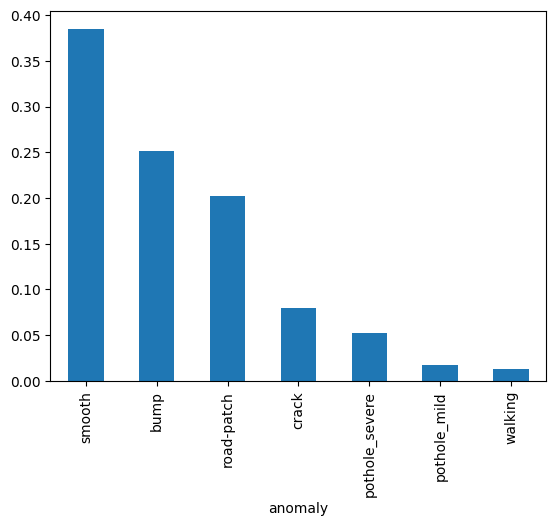

In [12]:
GTLJC_anomaly_distribution_overall.plot(kind = "bar")

In [13]:
# BY GOD'S GRACE ALONE
# Graciously  slicing data into unique anomaly  types
mask_no_movement = df["anomaly"] == "no-movement"
mask_static_vibration = df["anomaly"] == "static-vibration"
mask_smooth = df["anomaly"] == "smooth"
mask_crack = df["anomaly"] == "crack"
mask_bump = df["anomaly"] == "bump"
mask_road_patch = df["anomaly"] == "road-patch"
mask_pothole_mild = df["anomaly"] == "pothole_mild"
mask_pothole_severe = df["anomaly"] == "pothole_severe"


df_smooth = df[mask_smooth]
df_no_movement = df[mask_no_movement] 
df_static_vibration = df[mask_static_vibration]
df_smooth = df[mask_smooth]
df_crack = df[mask_crack]
df_bump = df[mask_bump]
df_road_patch = df[mask_road_patch]
df_pothole_mild = df[mask_pothole_mild]
df_pothole_severe = df[mask_pothole_severe]





In [14]:
# BY GOD'S GRACE ALONE
df_smooth["batch"].value_counts().count


<bound method Series.count of batch
9      300
30     300
38     200
55     200
39     200
      ... 
135    100
134    100
133    100
1       99
86      91
Name: count, Length: 120, dtype: int64>

In [15]:
# BY GOD'S GRACE ALONE
df_no_movement["batch"].value_counts().count


<bound method Series.count of Series([], Name: count, dtype: int64)>

In [16]:
#BY GOD'S GRACE ALONE

df_static_vibration["batch"].value_counts().count




<bound method Series.count of Series([], Name: count, dtype: int64)>

In [17]:
#BY GOD'S GRACE ALONE
df_crack["batch"].value_counts()


batch
4      100
130    100
251    100
249    100
248    100
247    100
246    100
245    100
243    100
242    100
241    100
237    100
236    100
235    100
124    100
12     100
123    100
111    100
110    100
109    100
108    100
105    100
99     100
97     100
74     100
73     100
3      100
58     100
100     83
Name: count, dtype: int64

In [18]:
# BY GOD'S GRACE ALONE
df_bump["batch"].value_counts().count


<bound method Series.count of batch
24    200
61    200
52    200
54    200
22    200
     ... 
28    100
0      99
58     38
49     22
86      9
Name: count, Length: 83, dtype: int64>

In [19]:
# BY GOD'S GRACE ALONE

df_road_patch["batch"].value_counts()


batch
2      398
3      300
18     200
1      200
19     200
      ... 
65     100
5      100
0       99
121     81
79      80
Name: count, Length: 64, dtype: int64

In [20]:
# BY GOD'S GRACE ALONE
df_pothole_mild["batch"].value_counts().count


<bound method Series.count of batch
9      100
4      100
5      100
8      100
50     100
125    100
121     19
203     17
Name: count, dtype: int64>

In [21]:
#BY GOD'S GRACE ALONE
df_pothole_severe["batch"].value_counts().count

<bound method Series.count of batch
15     100
194    100
42     100
41     100
31     100
28     100
14     100
258    100
257    100
256    100
255    100
250    100
244    100
239    100
238    100
234    100
204    100
195    100
203     83
64       2
Name: count, dtype: int64>

In [22]:
#BY GOD'S GRACE ALONE
def fix_batches(df_anomaly_type,batch_col = 'batch', expected_size = 100):
    new_rows = [] # Graciously to be used to store all the fixed-size rows to be elicited
    
    #Graciously regrouping rows in df_anomaly_type by common batch ids
    for batch_id, group in df_anomaly_type.groupby(batch_col):
        group = group.reset_index(drop=True)

        #If group size <= expected size, keep as is
        if len(group) <= expected_size:
            new_rows.append(group)
        else:
            #Graciously splitting the group into chunks of size
            for i in range(0,len(group),expected_size):
                chunk = group.iloc[i:i+expected_size].copy()
                #Graciously assigning a new unique batch name to new chunk
                chunk[batch_col] = f"{batch_id}_{i//expected_size}"
                new_rows.append(chunk)

        
    # Graciously concantenating all chunks back together
    fixed_df = pd.concat(new_rows, ignore_index=True)
    return fixed_df

    



In [23]:
# BY GOD'S GRACE ALONE
# Usage of above routine

df_no_movement_reorganized = not df_no_movement.empty and fix_batches(df_no_movement, batch_col="batch", expected_size=100)
df_static_vibration_reorganized = not df_static_vibration.empty and fix_batches(df_static_vibration, batch_col="batch", expected_size=100)

df_smooth_reorganized = not df_smooth.empty and fix_batches(df_smooth, batch_col="batch", expected_size=100)
df_crack_reorganized = not df_crack.empty and fix_batches(df_crack, batch_col="batch", expected_size=100)

df_bump_reorganized = not df_bump.empty and  fix_batches(df_bump, batch_col="batch", expected_size=100)
df_road_patch_reorganized = not df_road_patch.empty and fix_batches(df_road_patch, batch_col="batch", expected_size=100)

df_pothole_mild_reorganized = not df_pothole_mild.empty and fix_batches(df_pothole_mild, batch_col="batch", expected_size=100)
df_pothole_severe_reorganized = not df_pothole_severe.empty and fix_batches(df_pothole_severe, batch_col="batch", expected_size=100)


In [24]:
#BY GOD'S GRACE ALONE
df_smooth_reorganized["batch"].value_counts().count
# df_smooth_reorganized[df_smooth_reorganized["batch"]=="34_1"].head()

<bound method Series.count of batch
67      100
149     100
135     100
140     100
141     100
       ... 
30_2    100
1        99
86       91
34_1     73
32_1     48
Name: count, Length: 141, dtype: int64>

In [25]:
#BY GOD'S GRACE ALONE
df_crack_reorganized["batch"].value_counts().count

<bound method Series.count of batch
3      100
124    100
249    100
248    100
247    100
246    100
245    100
243    100
242    100
241    100
237    100
236    100
235    100
130    100
123    100
4      100
111    100
110    100
109    100
108    100
105    100
99     100
97     100
74     100
73     100
58     100
12     100
251    100
100     83
Name: count, dtype: int64>

In [26]:
#BY GOD'S GRACE ALONE
if isinstance(df_no_movement_reorganized,bool):
    print('Graciously Empty DataFrame')
else:
    df_no_movement_reorganized["batch"].value_counts().count

Graciously Empty DataFrame


In [27]:
# BY GOD'S GRACE ALONE
# df_static_vibration_reorganized["batch"].value_counts().count

In [28]:
# BY GOD'S GRACE ALONE
df_bump_reorganized["batch"].value_counts().count

<bound method Series.count of batch
59_1    100
96      100
145     100
139     100
138     100
       ... 
0        99
60_1     75
58       38
49       22
86        9
Name: count, Length: 94, dtype: int64>

In [29]:
# BY GOD'S GRACE ALONE
df_road_patch_reorganized["batch"].value_counts().count

<bound method Series.count of batch
40      100
37      100
114     100
113     100
103     100
       ... 
18_1    100
0        99
2_3      98
121      81
79       80
Name: count, Length: 74, dtype: int64>

In [30]:
# BY GOD'S GRACE ALONE
df_pothole_mild_reorganized["batch"].value_counts().count

<bound method Series.count of batch
4      100
5      100
8      100
9      100
50     100
125    100
121     19
203     17
Name: count, dtype: int64>

In [31]:
# BY GOD'S GRACE ALONE
df_pothole_severe_reorganized["batch"].value_counts().count

<bound method Series.count of batch
14     100
15     100
257    100
256    100
255    100
250    100
244    100
239    100
238    100
234    100
204    100
195    100
194    100
42     100
41     100
31     100
28     100
258    100
203     83
64       2
Name: count, dtype: int64>

In [32]:
# BY GOD'S GRACE ALONE
#Feature Engineering utility

from scipy.fft import rfft,rfftfreq
from scipy.stats import entropy, kurtosis, skew


def extract_features_from_batch(batch_df, sampling_rate = 100):
    features = {}
    signal_cols = ["acc_x","acc_y","acc_z","rot_x","rot_y","rot_z"]

    for col in signal_cols:
        signal = batch_df[col].values

        # Extracting time domain features
        features[f"{col}_mean"] = np.mean(signal)
        features[f"{col}_std"] = np.std(signal)
        features[f"{col}_min"] = np.min(signal)
        features[f"{col}_max"] = np.max(signal)
        features[f"{col}_range"] = np.ptp(signal)
        features[f"{col}_rms"] = np.sqrt(signal)
        features[f"{col}_skew"] = skew(signal)
        features[f"{col}_kurt"] = kurtosis(signal)
        features[f"{col}_zero_cross"] = ((signal[:-1] * signal[1:]) < 0).sum()

        #Extracting frequency domain features
        fft_vals = np.abs(rfft(signal))  #Real-valued Fourier Transforms in signal up to around the Nyquist frequency
        freqs = rfftfreq(len(signal), 1/sampling_rate)  #corresponding discrete frequency indices/samples up to around the Nyquist frequency

        fft_power = np.square(fft_vals)
        power_sum = np.sum(fft_power)
        norm_power = fft_power / power_sum if power_sum > 0 else fft_power

        features[f"{col}_fft_entropy"] = entropy(norm_power)

        #Graciously obtaining dominant frequency (index)
        dominant_idx = np.argmax(fft_power)
        features[f"{col}_dominant_freq"] = freqs[dominant_idx]

        #Graciously obtaining Band Energy ratios (Frequency Domain)
        low_band = fft_power[freqs < 5].sum()
        mid_band = fft_power[(freqs >= 5) & (freqs < 15)].sum()
        high_band = fft_power[freqs >= 15].sum()
        features[f"{col}_low_mid_band_ratio"] = low_band / (mid_band + 1e-16) # The exponent prevents a division-by-zero error
        features[f"{col}_high_mid_band_ratio"] = high_band / (mid_band + 1e-16) # The exponent prevents a division-by-zero error

    return features     





# BY GOD'S GRACE ALONE,
Graciously Recall: Higher sampling rate (even above the no of samples),  results in finer sampling, but may cause unintended interpolations not present in original data, begin confidently at the samplng_rate_per_batch equals len/no of samples

In [33]:
# BY GOD'S GRACE ALONE, Graciousy creating a routine  to extract features from all batches of same anomaly type

def apply_feature_extraction_across_all_same_anomaly_batches(entire_df):
    features_list = []
    for batch_id, group in entire_df.groupby("batch"):
        sampling_rate_per_batch = len(group)
        feats = extract_features_from_batch(group, sampling_rate=sampling_rate_per_batch)
        feats["batch"] = batch_id
        feats["label"] = group["anomaly"].iloc[0] # The label heading could be Graciously replaced with 'target'
        features_list.append(feats)

    df = pd.DataFrame(features_list)
    for axis in ["acc_x", "acc_y", "acc_z"]:
        col = f"{axis}_rms"
        df[f"{col}_avg"] = df[col].apply(
            lambda lst : np.nanmean(lst) if isinstance(lst, (list,np.ndarray)) else np.nan
        )

        df.drop(columns=col,inplace=True)
    
    return df


In [34]:
# BY GOD'S GRACE ALONE
# Defining the above function's usage pipeline, and testing the pipeline on the reorganized smooth-road data

features_list = []
reorganized_dataframes = [
    df_smooth_reorganized,
    df_crack_reorganized,
    df_bump_reorganized,
    df_road_patch_reorganized,
    df_pothole_mild_reorganized,
    df_pothole_severe_reorganized,
    df_no_movement_reorganized,
    df_static_vibration_reorganized,
    
]



# for df_reorganized in reorganized_dataframes:
#     if isinstance(df,bool):  #Handles empty dataframes which are of the boolean value "false" i.e.A dataframe?
#         pass




In [35]:
# BY GOD'S GRACE ALONE

df_smooth_engineered = apply_feature_extraction_across_all_same_anomaly_batches(df_smooth_reorganized)

df_smooth_engineered.head()

C:\Users\FOR_CHRIST_my_LOVE\AppData\Local\Temp\ipykernel_10768\885987338.py:21: RuntimeWarning: invalid value encountered in sqrt
  features[f"{col}_rms"] = np.sqrt(signal)
C:\Users\FOR_CHRIST_my_LOVE\AppData\Local\Temp\ipykernel_10768\1826276804.py:16: RuntimeWarning: Mean of empty slice
  lambda lst : np.nanmean(lst) if isinstance(lst, (list,np.ndarray)) else np.nan


,acc_x_mean,acc_x_std,acc_x_min,acc_x_max,acc_x_range,acc_x_skew,acc_x_kurt,acc_x_zero_cross,acc_x_fft_entropy,acc_x_dominant_freq,...,rot_z_zero_cross,rot_z_fft_entropy,rot_z_dominant_freq,rot_z_low_mid_band_ratio,rot_z_high_mid_band_ratio,batch,label,acc_x_rms_avg,acc_y_rms_avg,acc_z_rms_avg
0,1.621313,1.096548,-1.34,4.03,5.37,-0.831983,0.510453,5,1.038940,0.0,...,22,3.357122,0.0,2.760624,4.439716,1,smooth,1.322166,0.624912,3.070119
1,0.049600,0.869005,-1.49,2.65,4.14,0.560053,0.027567,25,2.544240,1.0,...,0,0.488003,0.0,57.634157,2.223222,2,smooth,0.795860,0.517942,3.118767
2,0.999200,0.774193,-0.77,2.82,3.59,-0.242383,-0.548317,15,1.230701,0.0,...,6,0.852017,0.0,48.154915,0.596520,3,smooth,1.048827,0.810607,3.125505
3,1.647800,0.584682,0.09,3.53,3.44,0.272866,0.584846,0,0.427634,0.0,...,22,2.521389,0.0,9.465329,8.256952,5,smooth,1.259945,0.678917,3.099559
4,1.057000,0.664905,-0.17,2.41,2.58,0.229404,-0.858886,6,1.004038,0.0,...,20,3.472660,11.0,0.335946,2.568191,12,smooth,0.990774,0.518117,3.135308


In [36]:
# BY GOD'S GRACE ALONE

df_smooth_engineered.columns

Index(['acc_x_mean', 'acc_x_std', 'acc_x_min', 'acc_x_max', 'acc_x_range',
       'acc_x_skew', 'acc_x_kurt', 'acc_x_zero_cross', 'acc_x_fft_entropy',
       'acc_x_dominant_freq', 'acc_x_low_mid_band_ratio',
       'acc_x_high_mid_band_ratio', 'acc_y_mean', 'acc_y_std', 'acc_y_min',
       'acc_y_max', 'acc_y_range', 'acc_y_skew', 'acc_y_kurt',
       'acc_y_zero_cross', 'acc_y_fft_entropy', 'acc_y_dominant_freq',
       'acc_y_low_mid_band_ratio', 'acc_y_high_mid_band_ratio', 'acc_z_mean',
       'acc_z_std', 'acc_z_min', 'acc_z_max', 'acc_z_range', 'acc_z_skew',
       'acc_z_kurt', 'acc_z_zero_cross', 'acc_z_fft_entropy',
       'acc_z_dominant_freq', 'acc_z_low_mid_band_ratio',
       'acc_z_high_mid_band_ratio', 'rot_x_mean', 'rot_x_std', 'rot_x_min',
       'rot_x_max', 'rot_x_range', 'rot_x_rms', 'rot_x_skew', 'rot_x_kurt',
       'rot_x_zero_cross', 'rot_x_fft_entropy', 'rot_x_dominant_freq',
       'rot_x_low_mid_band_ratio', 'rot_x_high_mid_band_ratio', 'rot_y_mean',
       

In [37]:
# BY GOD'S GRACE ALONE
df_cracked_road_engineered = apply_feature_extraction_across_all_same_anomaly_batches(df_crack_reorganized)
df_cracked_road_engineered.head()
df_cracked_road_engineered.info()

C:\Users\FOR_CHRIST_my_LOVE\AppData\Local\Temp\ipykernel_10768\885987338.py:21: RuntimeWarning: invalid value encountered in sqrt
  features[f"{col}_rms"] = np.sqrt(signal)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 80 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   acc_x_mean                 29 non-null     float64
 1   acc_x_std                  29 non-null     float64
 2   acc_x_min                  29 non-null     float64
 3   acc_x_max                  29 non-null     float64
 4   acc_x_range                29 non-null     float64
 5   acc_x_skew                 29 non-null     float64
 6   acc_x_kurt                 29 non-null     float64
 7   acc_x_zero_cross           29 non-null     int32  
 8   acc_x_fft_entropy          29 non-null     float64
 9   acc_x_dominant_freq        29 non-null     float64
 10  acc_x_low_mid_band_ratio   29 non-null     float64
 11  acc_x_high_mid_band_ratio  29 non-null     float64
 12  acc_y_mean                 29 non-null     float64
 13  acc_y_std                  29 non-null     float64
 

In [ ]:
# BY GOD'S GRACE ALONEapply_feature_extraction_across_all_same_anomaly_batches(df_bump_reorganized)
df_bump_engineered = apply_feature_extraction_across_all_same_anomaly_batches(df_bump_reorganized)
df_bump_engineered.head()

C:\Users\FOR_CHRIST_my_LOVE\AppData\Local\Temp\ipykernel_10768\885987338.py:21: RuntimeWarning: invalid value encountered in sqrt
  features[f"{col}_rms"] = np.sqrt(signal)
C:\Users\FOR_CHRIST_my_LOVE\AppData\Local\Temp\ipykernel_10768\1826276804.py:16: RuntimeWarning: Mean of empty slice
  lambda lst : np.nanmean(lst) if isinstance(lst, (list,np.ndarray)) else np.nan
C:\Users\FOR_CHRIST_my_LOVE\AppData\Local\Temp\ipykernel_10768\1826276804.py:16: RuntimeWarning: Mean of empty slice
  lambda lst : np.nanmean(lst) if isinstance(lst, (list,np.ndarray)) else np.nan


,acc_x_mean,acc_x_std,acc_x_min,acc_x_max,acc_x_range,acc_x_skew,acc_x_kurt,acc_x_zero_cross,acc_x_fft_entropy,acc_x_dominant_freq,...,rot_z_zero_cross,rot_z_fft_entropy,rot_z_dominant_freq,rot_z_low_mid_band_ratio,rot_z_high_mid_band_ratio,batch,label,acc_x_rms_avg,acc_y_rms_avg,acc_z_rms_avg
0,2.021515,1.168895,-0.55,6.38,6.93,0.628851,1.496971,8,0.904656,0.0,...,14,2.208399,0.0,8.567887,4.036235,0,bump,1.399201,0.545876,3.084880
1,1.457800,0.849356,-1.08,3.35,4.43,-0.180742,-0.029264,6,0.888405,0.0,...,22,3.337352,6.0,0.143877,0.913304,4,bump,1.215206,0.643780,3.106463
2,2.084700,0.908747,-0.60,5.64,6.24,0.443414,3.141261,4,0.587804,0.0,...,14,2.195587,0.0,5.994230,2.355123,5,bump,1.433447,0.788197,3.076651
3,2.002100,0.443823,0.69,3.26,2.57,-0.331944,0.491407,0,0.197430,0.0,...,3,0.826294,0.0,25.255149,1.114924,6,bump,1.405328,0.493086,3.088865
4,1.806200,0.788718,-0.30,5.22,5.52,0.437386,2.902053,4,0.605621,0.0,...,15,3.025993,0.0,1.329849,1.262326,7,bump,1.325885,0.483213,3.074360


In [39]:
# BY GOD'S GRACE ALONE

df_road_patch_engineered = apply_feature_extraction_across_all_same_anomaly_batches(df_road_patch_reorganized)
df_road_patch_engineered.head()

C:\Users\FOR_CHRIST_my_LOVE\AppData\Local\Temp\ipykernel_10768\885987338.py:21: RuntimeWarning: invalid value encountered in sqrt
  features[f"{col}_rms"] = np.sqrt(signal)


,acc_x_mean,acc_x_std,acc_x_min,acc_x_max,acc_x_range,acc_x_skew,acc_x_kurt,acc_x_zero_cross,acc_x_fft_entropy,acc_x_dominant_freq,...,rot_z_zero_cross,rot_z_fft_entropy,rot_z_dominant_freq,rot_z_low_mid_band_ratio,rot_z_high_mid_band_ratio,batch,label,acc_x_rms_avg,acc_y_rms_avg,acc_z_rms_avg
0,1.845354,0.519905,0.03,3.25,3.22,-0.346706,0.814320,0,0.295959,0.0,...,3,0.972181,0.0,43.587018,2.139482,0,road-patch,1.340592,0.842273,3.095072
1,2.040900,1.246293,-1.14,5.69,6.83,0.036359,0.219225,12,0.977014,0.0,...,32,3.499327,0.0,1.173353,2.903273,5,road-patch,1.422425,0.826361,3.047093
2,1.911400,0.711951,-0.81,3.38,4.19,-0.688333,1.138997,2,0.470147,0.0,...,0,0.200514,0.0,234.407429,2.815369,6,road-patch,1.366168,0.618941,3.107534
3,1.641500,0.752156,-0.38,4.33,4.71,0.156767,1.204630,2,0.667698,0.0,...,20,3.203068,1.0,2.103433,2.906859,7,road-patch,1.249499,0.678916,3.093149
4,1.212800,0.597709,-0.81,3.40,4.21,0.267395,2.381012,2,0.719002,0.0,...,10,3.437295,1.0,1.326246,2.265204,10,road-patch,1.075047,0.728909,3.126257


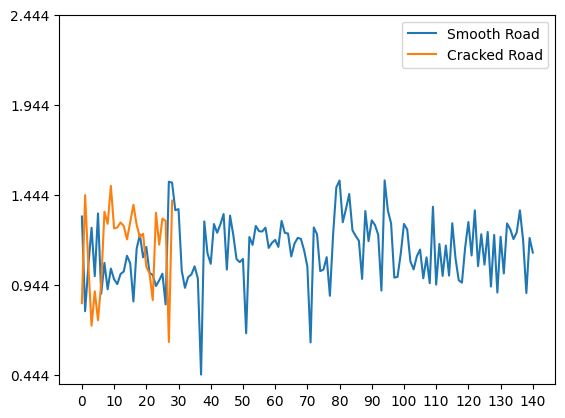

In [40]:
# BY GOD'S GRACE ALONE, comparing the power contained in the above two engineered datasets, both their time and frequency domain powers

plt.plot(df_smooth_engineered["acc_x_rms_avg"], label = "Smooth Road")
plt.plot(df_cracked_road_engineered["acc_x_rms_avg"], label = "Cracked Road")
plt.legend()
plt.xticks(
    ticks = np.arange(
        df_smooth_engineered["acc_x_rms_avg"].index.min(),
        df_smooth_engineered["acc_x_rms_avg"].index.max() + 1,
        step = 10
    )
)

plt.yticks(
    ticks = np.arange(
        df_smooth_engineered["acc_x_rms_avg"].min(),
        df_smooth_engineered["acc_x_rms_avg"].max() + 1,
        step = 0.5
    )
);

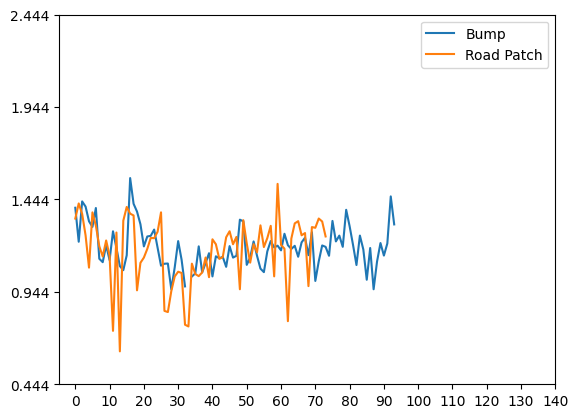

In [43]:
# BY GOD'S GRACE ALONE, comparing the power contained in the above two engineered datasets, both their time and frequency domain powers
plt.plot(df_bump_engineered["acc_x_rms_avg"], label = "Bump")
plt.plot(df_road_patch_engineered["acc_x_rms_avg"], label = "Road Patch")
plt.legend()
plt.xticks(
    ticks = np.arange(
        df_smooth_engineered["acc_x_rms_avg"].index.min(),
        df_smooth_engineered["acc_x_rms_avg"].index.max() + 1,
        step = 10
    )
)

plt.yticks(
    ticks = np.arange(
        df_smooth_engineered["acc_x_rms_avg"].min(),
        df_smooth_engineered["acc_x_rms_avg"].max() + 1,
        step = 0.5
    )
);

C:\Users\FOR_CHRIST_my_LOVE\AppData\Local\Temp\ipykernel_10768\885987338.py:21: RuntimeWarning: invalid value encountered in sqrt
  features[f"{col}_rms"] = np.sqrt(signal)
C:\Users\FOR_CHRIST_my_LOVE\AppData\Local\Temp\ipykernel_10768\885987338.py:21: RuntimeWarning: invalid value encountered in sqrt
  features[f"{col}_rms"] = np.sqrt(signal)


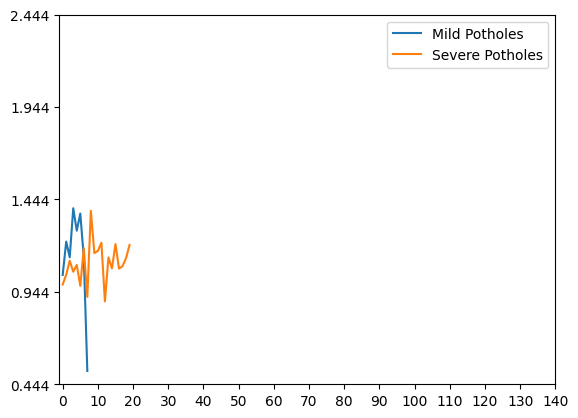

In [47]:
# BY GOD'S GRACE ALONE
df_pothole_mild_engineered = apply_feature_extraction_across_all_same_anomaly_batches(df_pothole_mild_reorganized)
df_pothole_severe_engineered = apply_feature_extraction_across_all_same_anomaly_batches(df_pothole_severe_reorganized)

plt.plot(df_pothole_mild_engineered["acc_x_rms_avg"], label = "Mild Potholes")
plt.plot(df_pothole_severe_engineered["acc_x_rms_avg"], label = "Severe Potholes")
plt.legend()
plt.xticks(
    ticks = np.arange(
        df_smooth_engineered["acc_x_rms_avg"].index.min(),
        df_smooth_engineered["acc_x_rms_avg"].index.max() + 1,
        step = 10
    )
)

plt.yticks(
    ticks = np.arange(
        df_smooth_engineered["acc_x_rms_avg"].min(),
        df_smooth_engineered["acc_x_rms_avg"].max() + 1,
        step = 0.5
    )
);

In [ ]:
# # BY GOD'S GRACE ALONE

